# Load Data and Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(r'C:\Users\Ghaza\Downloads\CDS Project\Data\Processed\train_data.csv')
df_train

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment,PerformanceRating
0,2,6,2,0,4,7,34,1,17,5,4,3
1,2,7,4,7,7,15,40,2,12,5,4,2
2,2,6,3,1,5,6,25,2,12,3,1,3
3,2,3,2,1,2,10,39,1,19,13,5,2
4,3,0,0,0,0,11,33,1,20,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1496,2,7,7,1,7,10,31,3,22,3,1,4
1497,1,5,4,0,3,6,26,4,20,11,4,4
1498,1,4,3,0,0,5,38,4,21,3,1,4
1499,2,5,4,1,2,7,32,3,24,12,4,4


# Assign X_train, X_test, y_train, y_test

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.PerformanceRating


In [4]:
X_train

,EmpJobLevel,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkExperienceInYears,Age,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpJobRole,EmpDepartment
0,2,6,2,0,4,7,34,1,17,5,4
1,2,7,4,7,7,15,40,2,12,5,4
2,2,6,3,1,5,6,25,2,12,3,1
3,2,3,2,1,2,10,39,1,19,13,5
4,3,0,0,0,0,11,33,1,20,13,5
...,...,...,...,...,...,...,...,...,...,...,...
1496,2,7,7,1,7,10,31,3,22,3,1
1497,1,5,4,0,3,6,26,4,20,11,4
1498,1,4,3,0,0,5,38,4,21,3,1
1499,2,5,4,1,2,7,32,3,24,12,4


In [5]:
y_train

0       3
1       2
2       3
3       2
4       4
       ..
1496    4
1497    4
1498    4
1499    4
1500    4
Name: PerformanceRating, Length: 1501, dtype: int64

# Machine Learning Model

## XGBoost

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# defining parameter range 

parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
   
best_xgb = RandomizedSearchCV(XGBClassifier(), parameters, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
best_xgb = best_xgb.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(best_xgb.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[20:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}


In [16]:
best_xgb = XGBClassifier(
    min_child_weight = 1, max_depth = 8, learning_rate=0.15, gamma=0.3, colsample_bytree=0.5, n_jobs=-1
)

best_xgb = best_xgb.fit(X_train, y_train)

[20:24:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Feature importance

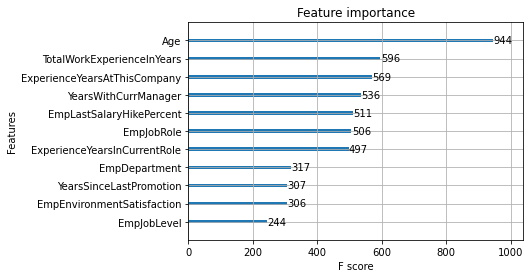

In [20]:
from xgboost import plot_importance

plot_importance(best_xgb)
plt.show()

Based on graph in above,the three best feature that considered as important to the prediction model are **Age, TotalWorkExperienceInYears, and ExperienceYearsAtThisCompany**

### Save Model

In [7]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

xgb_Filename = "xgb_model.pkl"  

with open(xgb_Filename, 'wb') as file:  
    pickle.dump(best_xgb, file)

## SVC

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC 


# defining parameter range 
param_grid_SVM = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
   
best_SVC = RandomizedSearchCV(SVC(), param_grid_SVM, refit = True, verbose = 3,n_jobs=-1) 
   
# fitting the model for grid search 
best_SVC = best_SVC.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(best_SVC.best_params_) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}


### Save Model

In [9]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

svc_Filename = "svc_model.pkl"  

with open(svc_Filename, 'wb') as file:  
    pickle.dump(best_SVC, file)

## RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

randomforest = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_randomforest = RandomizedSearchCV(randomforest, param_grid,refit=True, cv= 5)


clf_randomforest = clf_randomforest.fit(X_train, y_train) 
print('Best parameters found:\n', clf_randomforest.best_params_)

Best parameters found:
 {'n_estimators': 200, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}


### Save Model

In [11]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

RF_Filename = "RF_model.pkl"  

with open(RF_Filename, 'wb') as file:  
    pickle.dump(clf_randomforest, file)

## ANN

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(50,)],
    'activation': ['sigmoid','tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.01, 0.0005]
}
clf = RandomizedSearchCV(mlp_gs, parameter_space,refit=True, n_jobs=-1, cv=5)
clf = clf.fit(X_train, y_train) 
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'solver': 'adam', 'hidden_layer_sizes': (10, 30, 10), 'alpha': 0.0005, 'activation': 'relu'}


### Save Model

In [13]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

ANN_Filename = "ANN_model.pkl"  

with open(ANN_Filename, 'wb') as file:  
    pickle.dump(clf, file)